# Parte I

## 1)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [ ]:
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
def load_car_data(filename):
    # load car data
    df = pd.read_csv(filename, header=None)
    # rename columns    
    dict_columns = dict()
    for i in range(7):
        dict_columns[i] = column_names[i]
    
    df.rename(columns=dict_columns, inplace=True)
    
    return df

In [ ]:
def transformar_dados(dados):
  """
  Transforma os valores categóricos em numéricos
  """

  buying_maint = {'low':0,'med':1,'high':2, 'vhigh':3}
  doors = {'5more':5}
  persons = {'more':5}
  lug_boot = {'small':0, 'med':1, 'big':2}
  safety = {'low':0, 'med':1, 'high':2}
  class_ = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}
  list_dicionarios = [buying_maint, doors, persons, lug_boot, safety, class_]
  
  # substitui os valores da coluna por numeros
  for d in list_dicionarios:
      for k in d:
          dados.replace(k,d[k], inplace=True)
  
  dados = dados.astype('float')
  return dados

In [ ]:
car_data = load_car_data("car.data")
car_data = transformar_dados(car_data)
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,2.0,2.0,0.0,0.0,0.0
1,3.0,3.0,2.0,2.0,0.0,1.0,0.0
2,3.0,3.0,2.0,2.0,0.0,2.0,0.0
3,3.0,3.0,2.0,2.0,1.0,0.0,0.0
4,3.0,3.0,2.0,2.0,1.0,1.0,0.0


## a)

In [ ]:
# seleciona os valores da base de dados
X = car_data.iloc[:, :-1].values

# Calcula a média de cada atributo
medias_atributos = X.mean(axis=0)
# subtrai a média de cada atributo (garante que a média dos atributos é zero)
X_ = X - medias_atributos
# calcula a matriz de covariâncoa
cov_matriz = np.cov(X_.T)

## calcula os autovalores/vetores
# os autovalores não necessariamente estão ordenados do maior para o menor
autovalores, autovetores = np.linalg.eig(cov_matriz)
# orderna os autovalores do maior para o menor
ord_autovalores =  sorted(autovalores, reverse=True)

# seleciona os indices dos autovetores associados aos autovalores
idx_cp1 = np.where(np.isclose(autovalores,ord_autovalores[0]))[0][0]
idx_cp2 = np.where(np.isclose(autovalores,ord_autovalores[1]))[0][0]

# dados projetados sobre as 2 componentes principais
projected_data = X_.dot(autovetores[:, [idx_cp1, idx_cp2]])

# criação de um dataframe pandas
dict_proj = {'cp1':projected_data[:, 0], 'cp2':projected_data[:, 1], 'class':car_data['class']}

In [ ]:
df_proj = pd.DataFrame(dict_proj)
df_proj.head()

,cp1,cp2,class
0,1.666667,1.5,0.0
1,1.666667,1.5,0.0
2,1.666667,1.5,0.0
3,1.666667,1.5,0.0
4,1.666667,1.5,0.0


**Visualização do PCA**

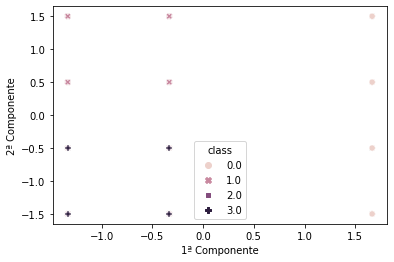

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(x='cp1', y='cp2', hue='class', style='class', data=df_proj, ax=ax)
plt.xlabel("1ª Componente")
plt.ylabel("2ª Componente")
plt.show()

**Figura com cada classe em uma imagem separada**

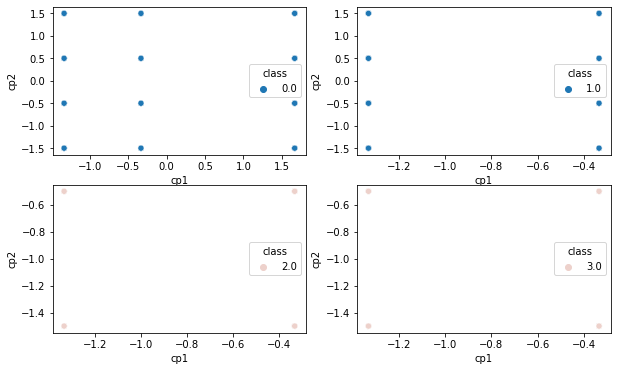

In [ ]:
df_unacc = df_proj[df_proj['class']==0.0]
df_acc = df_proj[df_proj['class']==1.0]
df_good = df_proj[df_proj['class']==2.0]
df_vgood = df_proj[df_proj['class']==3.0]

fig, ax = plt.subplots(figsize=(10, 6), ncols=2,nrows=2)
sns.scatterplot(x='cp1', y='cp2', hue='class', data=df_unacc, ax=ax[0,0])
sns.scatterplot(x='cp1', y='cp2', hue='class', data=df_acc, ax=ax[0,1])
sns.scatterplot(x='cp1', y='cp2', hue='class', data=df_good, ax=ax[1,0])
sns.scatterplot(x='cp1', y='cp2', hue='class', data=df_vgood, ax=ax[1,1])
plt.show()

**Comentários da solução**:

Antes da aplicação do PCA, é necessário que as variáveis de entrada sejam convertidas para valores numéricos. As variáveis da base de dados são categóricas, mas os valores podem ser ordenados.

Dessa forma, o primeiro passo foi transformar os valores categóricos para numéricos, que é feito pela função `transformar_dados`. Por exemplo, valores categóricos como *low*, *med*, *high* ou *small*, *med*, *big* passam a ter os valores de $0$, $1$ e $2$.

Após a transformação dos dados, foi selecionado as variáveis a serem utilizadas no PCA (6 primeiras colunas). Os valores dessas colunas foram normalizados por meio da subtração da média. Com os dados normalizados, calculou-se a matriz de covariância dos dados utilizando a função `np.cov`. A partir da matriz de covariância, obtem-se os autovalores e autovetores, com a função `np.linalg.eig`.

Os índices dos maiores autovalores indicam quais autovetores tem maior significância para representar os dados, mas como esses valores não necessariamente estão ordenados, é feita uma ordenação do maior para o menor autovalor e os autovetores correspondentes são utilizados para a projeção dos dados.


**Comentários do gráfico**

Pelo 1º gráfico infere-se que existem três grupos de classes com características bem distintas entre si, com a a classe `acc` no canto superior esquerdo, a classe `vgood` no canto inferior esquerdo, e a classe `unacc` do lado direito do gráfico. Entretanto, a classe `good` não aparece no gráfico, o que sugere que a projeção dessa classe pode ter valores iguais à uma das outras classes.

De fato, o 2º gráfico, com a projeção de cada uma das classes em uma figura separada, mostra que a classe `unacc` possui alguns pontos (do lado esquerdo) iguais às outras 3 classes; a classe `acc` possui alguns pontos iguais às classes `good` e `vgood` e as classes `good` e `vgood` possuem os mesmo pontos.

Assim, o fato de as classes terem pontos compartilhados, indica que a base de dados possui classes que são difícieis de distinguir/separar entre si.

## b)

**Factor Loadings**

In [ ]:
componentes_autovetores = autovetores[:, [idx_cp1, idx_cp2]]

In [ ]:
componentes_autovetores

array([[-1.95130107e-16,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00]])

In [ ]:
normdata = normalize(componentes_autovetores, norm='l2')

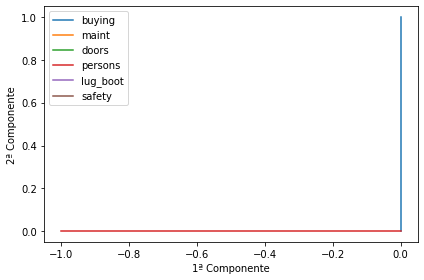

In [ ]:
z = np.zeros((2, 1))
variaveis = car_data.columns[:-1]
for i, v in enumerate(variaveis):        
    aT =  normdata[[i],:].T
    concat = np.concatenate([z,aT], axis=1)
    x = concat[0]
    y = concat[1]
    plt.plot(x, y, label=v)
plt.xlabel("1ª Componente")
plt.ylabel("2ª Componente")
plt.legend()
plt.tight_layout()
plt.show()

O gráfico do *factor loadings* não mostra que as variáveis são correlacionadas. A variável buying possui correlação positiva muito forte com a segunda componente principal enquanto que a variável *persons* possui um correlação negativa com a primeira componente. As outras variáveis possuem factor loadings iguais à $0$ nas duas componentes.

## c) 

In [ ]:
def entropia(c):
  # normaliza o vetor
  c_normalized = c / float(np.sum(c))
  # seleciona apenas valores diferentes de 0
  c_normalized = c_normalized[np.nonzero(c_normalized)]
  # calculo da entropia
  H = -sum(c_normalized*np.log2(c_normalized))  
  return H

def calc_MI(X,Y,bins):
  ## Cálculo das probabilidades das variáveis X e Y
  # probabilidade de X
  c_X = np.histogram(X,bins)[0]
  # probilidade de Y
  c_Y = np.histogram(Y,bins)[0]
  # probabilidade de ambos
  c_XY = np.histogram2d(X,Y,bins)[0]

  ## Calculo das entropias
  H_X = entropia(c_X)
  H_Y = entropia(c_Y)
  H_XY = entropia(c_XY)
  
  # cálculo da informação mútua
  MI = H_X + H_Y - H_XY
  return MI

In [ ]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,2.0,2.0,0.0,0.0,0.0
1,3.0,3.0,2.0,2.0,0.0,1.0,0.0
2,3.0,3.0,2.0,2.0,0.0,2.0,0.0
3,3.0,3.0,2.0,2.0,1.0,0.0,0.0
4,3.0,3.0,2.0,2.0,1.0,1.0,0.0


In [ ]:
car_data_M = car_data.values

In [ ]:
dict_MI = {}
for i in range(6):
  dict_MI[column_names[i]] = calc_MI(car_data_M[:,i], car_data_M[:,-1],bins=7)

In [ ]:
sorted(dict_MI.items(), key=lambda item: item[1], reverse=True)

[('safety', 0.26218435655426386),
 ('persons', 0.21966296333990787),
 ('buying', 0.0964489691696131),
 ('maint', 0.07370394692148485),
 ('lug_boot', 0.030008141247605646),
 ('doors', 0.004485716626632108)]

**Discussão**: Através do cálculo da informação mútua, infere-se que, dentre as variáveis de entrada, as variáveis *safety* e *persons* possuem as maiores probabilidades de ocorrerem simultâneamente com a variável alvo ($0.26$ e $0.21$, respectivamente), sendo assim, as variáveis que mais influenciam na classificação os carros de acordo com a 4 classes.

As variáveis *buying*, *maint*, *doors* e *lug_boot* possuem valores de informação mútua inferiores à $0.1$, indicando uma probabilidade menor de ocorrerem simultâneamente com a variável alvo. A variável *doors* é a que possui o valor mais baixo (inferior à $0.0$) e seria uma forte candidata à remoção antes da aplicação de alguma ténica de redução de dimensionalidade, por exemplo. 

